# Introduction to complex networks theory
## Lesson 4: Types of links within networks

The goal of this notebook is to start geting familiar with the [networkx](https://networkx.org/) library, specially:
- network creation
- network import/export
- network drawing
- degree distribution of a network

In [1]:
# libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# !pip install networkx

### Directed networks

As in the last class, let's first create a simple directed graph and add a few links. In this case, we're not creating a graph object, but directed graph `DiGraph`:

In [3]:
G = nx.DiGraph()

We can add a few directed edges to this graph and visualise it to investigate the differences:

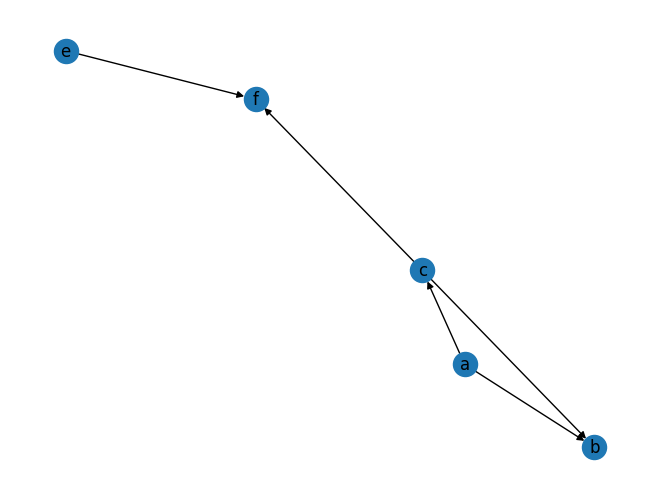

In [4]:
# G.add_edge('a','b')
G.add_edges_from([('a','b'),('a','c'),('e','f'),('c','f'),('c','b')])
nx.draw(G,with_labels=True)

As we might be drawing variants of these small graphs, we can fix a few nicer options in a function. More about python functions you can read [here](https://www.w3schools.com/python/python_functions.asp).

In [5]:
def pretty_plot(G):
    """A function that draws a graph G with predefined node sizes and colours."""
    nx.draw_circular(G,
            with_labels=True,
            node_color='darkcyan',
            node_size=1000,
            edge_color='lightgrey',
            width=4,
            font_color='white',
            font_size=16,
            )

Let's now call our function on the same graph to compare the results:

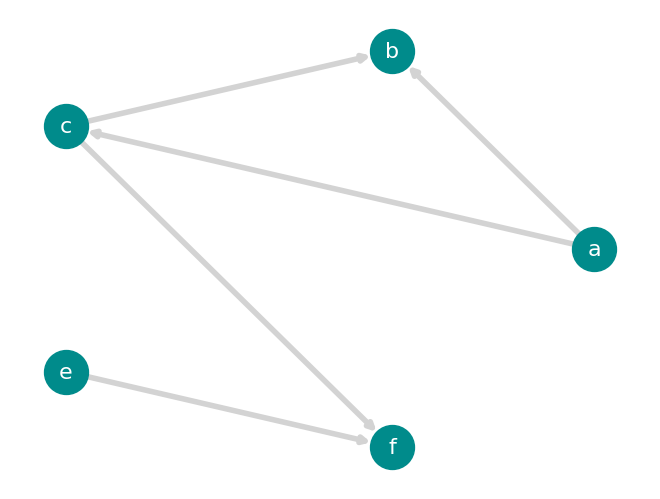

In [6]:
pretty_plot(G)

Now we can more clearly see all the links going in and out of node C.

As with undirected graph, we can see all the nodes or edges of the graph:

In [7]:
G.nodes

NodeView(('a', 'b', 'c', 'e', 'f'))

In [8]:
G.has_edge('e','f')

True

In [9]:
G.has_edge('f','e')

False

How about the degrees?

In [10]:
G.degree()

DiDegreeView({'a': 2, 'b': 2, 'c': 3, 'e': 1, 'f': 2})

We see now that the node f has degree 2 the same as node a, while in one case that is indegree, and in another that is outdegree. In the case of directed network, `degree()` tells us about the total number of links given node is a part of, independent of their direction. If we want ot investigate in or out degree specifically, we have appropriate functions `in_degree` and `out_degree`:

In [11]:
G.in_degree('c'), G.out_degree('c'), G.degree('c')

(1, 2, 3)

We can also investigate inwadr edges of a given node, or out edges:

In [12]:
G.in_edges('b'), G.out_edges('b')

(InEdgeDataView([('a', 'b'), ('c', 'b')]), OutEdgeDataView([]))

Instead of searching for "neighbors" of a node, for directed graphs, predecessors ("in-neighbors") and successors ("out-neighbors") make more sense:

In [13]:
list(G.predecessors('c'))

['a']

In [14]:
list(G.successors('c'))

['f', 'b']

##### Real network example

As an example of directed graph, we will investigate a food web among the species found in [Little Rock Lake](https://networks.skewed.de/net/foodweb_little_rock). All the data is in the data folder `data/little_rock_foodweb`.

We'll import nodes and edges dataframes:

In [15]:
nodes = pd.read_csv('../data/little_rock_foodweb/nodes.csv')
nodes.head(2)

,# index,name,group,_pos
0,0,Fine organic matter,Fine organic matter,"array([ 9.84800554, 10.53079274])"
1,1,Tabellaria,Chrysophyceae,"array([10.24942227, 10.33781662])"


We see that nodes have names associated with every specie, as well as their group. We can quickly check how many groups there are, and how many species per group:

In [16]:
nodes.groupby(' group').size().sort_values(ascending=False).head()

 group
Diptera              31
Filamentous algea    25
Green algea          15
Pelagic rotifers     14
Bhentic cladocera    12
dtype: int64

Let's load also the information about the edges:

In [17]:
edges = pd.read_csv('../data/little_rock_foodweb/edges.csv')
edges.head(2)

,# source,target
0,0,1
1,0,2


To construct the network, we'll follow the same path as the last time, but pay attention to the new argument `create_using`. With it, we are stating that we 

In [18]:
G_food_web = nx.from_pandas_edgelist(edges, source = '# source', target = ' target', create_using =nx.DiGraph)

In [19]:
G_food_web.is_directed()

True

In [20]:
list(G_food_web.neighbors(1))

[65, 67, 68, 69, 76]

In [21]:
G_food_web.in_edges(1)

InEdgeDataView([(0, 1)])

In [22]:
G_food_web.out_edges(1)

OutEdgeDataView([(1, 65), (1, 67), (1, 68), (1, 69), (1, 76)])

In [23]:
condition = (edges['# source']==1)|(edges[' target']==1)

edges[condition]

,# source,target
0,0,1
63,1,65
64,1,67
65,1,68
66,1,69
67,1,76


In [24]:
G_flat = G_food_web.to_undirected()

In [25]:
list(G_food_web.neighbors(1))

[65, 67, 68, 69, 76]

In [26]:
#G_flat.in_edges()
list(G_flat.neighbors(1))

[0, 65, 67, 68, 69, 76]

As last time we can also investigate adjecency matrix:

In [27]:
nx.adjacency_matrix(G_food_web).todense()

/var/folders/nx/gw8g05z555qgk82jcftv94z40000gn/T/ipykernel_39328/1141414601.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  nx.adjacency_matrix(G_food_web).todense()


matrix([[0, 1, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

Let's create data frames with in_degree and out_degree of all nodes:

In [28]:
indegrees = pd.DataFrame(G_food_web.in_degree(),columns=['node','in_degree'])
indegrees.head(2)

,node,in_degree
0,0,0
1,1,1


In [29]:
outdegrees = pd.DataFrame(G_food_web.out_degree(),columns=['node','out_degree'])
outdegrees.head(2)

,node,out_degree
0,0,63
1,1,5


These we can plot, first as a bar plot to compare in/out degree of every node individually:

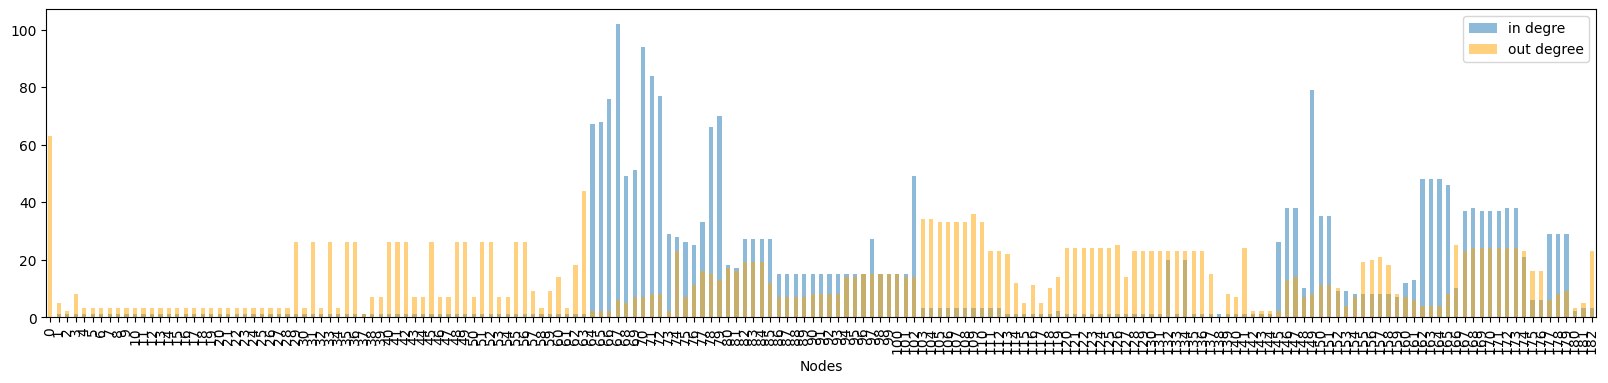

In [30]:
plt.figure(figsize=(20,4))
indegrees['in_degree'].plot(kind='bar',alpha=0.5,label='in degre')
outdegrees['out_degree'].plot(kind='bar',alpha=0.5,color='orange',label='out degree')
plt.legend()
plt.xlabel('Nodes')
plt.show()

In [31]:
max(indegrees['in_degree']),max(outdegrees['out_degree'])

(102, 63)

##### Find the node that has the maximal in_degree/out_degree:

In [32]:
### your code here

We can also see if the in/out degree distribution differ:

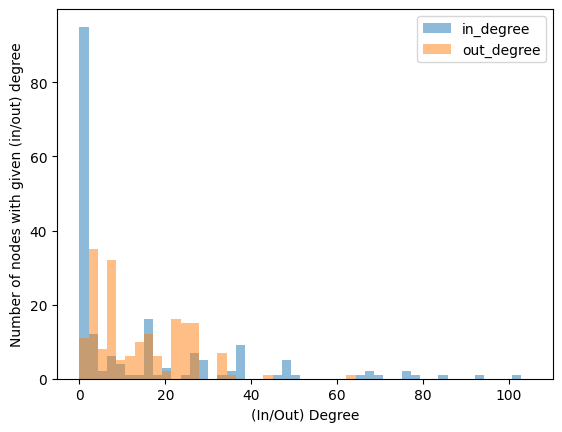

In [33]:
plt.hist(indegrees['in_degree'],bins=np.linspace(0,105,50),alpha=0.5,label='in_degree')
plt.hist(outdegrees['out_degree'],bins=np.linspace(0,105,50),alpha=0.5,label='out_degree')
#plt.yscale('log')
plt.legend()
plt.xlabel('(In/Out) Degree')
plt.ylabel('Number of nodes with given (in/out) degree')
plt.show()

We can compare means:

In [34]:
indegrees.in_degree.mean(),outdegrees.out_degree.mean()

(13.628415300546449, 13.628415300546449)

And medians:

In [35]:
indegrees.in_degree.median(),outdegrees.out_degree.median()

(1.0, 11.0)

Finally, let's practice more table merges and join together in/out degree with the names of the species:

In [36]:
joint_df = pd.merge(indegrees,outdegrees,on='node')

In [37]:
joint_df = pd.merge(left = nodes[['# index',' name']],
                    right = joint_df,
                    left_on='# index',
                    right_on='node')

Top 5 species by in_degree:

In [38]:
joint_df.sort_values(by='in_degree',ascending=False).head(5)

,# index,name,node,in_degree,out_degree
69,69,Campeloma decisum,69,102,6
64,64,Amphipoda Crangonyx gracilis,64,94,7
73,73,Stenochironomus,73,84,8
75,75,Polypedilum,75,79,8
74,74,Pseudochironomus,74,77,8


Top 5 species by out_degree:

In [39]:
joint_df.sort_values(by='out_degree',ascending=False).head(5)

,# index,name,node,in_degree,out_degree
0,0,Fine organic matter,0,0,63
63,63,Spongilla lacustris,63,1,44
136,136,Alonella excisa,136,3,36
108,108,Enallagma,108,3,34
131,131,Ophryoxus gracilis,131,3,34


### Weighted networks

As an example of a weighted network, we'll use [Game of thrones network](https://networks.skewed.de/net/game_thrones), let's load first the edges:

In [40]:
# data = pd.read_csv('../data/london_transport/edges.csv') # this is also a weighted network, you can try it out
data = pd.read_csv('../data/game_thrones/edges.csv')

data.head()

,# source,target,weight
0,0,1,5
1,0,2,31
2,2,82,6
3,2,58,34
4,2,76,12


We see that already with every link the weight is associated in the column ' weight', let's sort the table based on that column to inspect min/max values:

In [41]:
data.sort_values(by=' weight')

,# source,target,weight
100,12,5,4
34,6,26,4
263,50,85,4
76,7,41,4
257,50,21,4
...,...,...,...
150,20,6,54
159,21,9,69
273,50,6,77
16,4,37,88


Creating a weighted network follows the same logic as with unweighted (either directed or undirected), the only difference is that we pass the colum with weight values:

In [42]:
G_gt = nx.from_pandas_edgelist(data, source = '# source', target = ' target', edge_attr=' weight')

If we just call the basic plotting function:

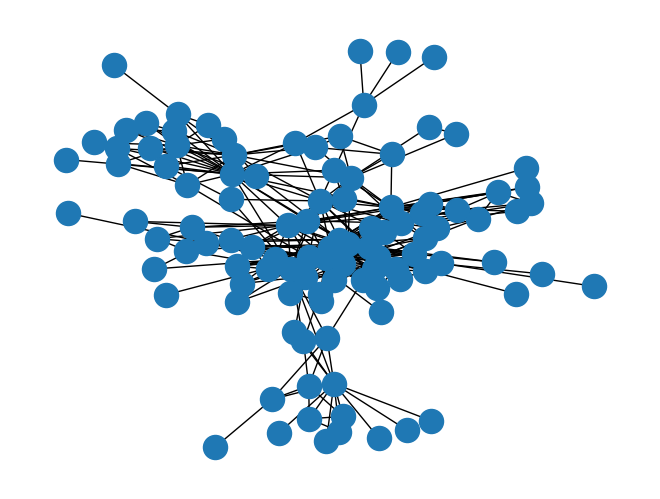

In [43]:
nx.draw_spring(G_gt)

We don't see the difference, e.g. weights are not plotted. That is why we invest a bit more time to plot this network and see the weights associated with each link:

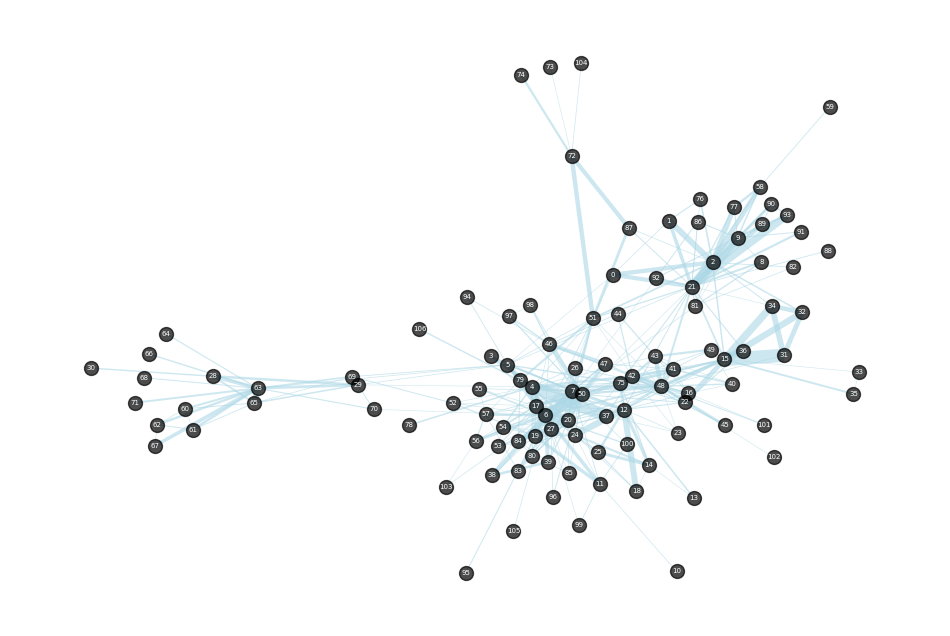

In [44]:
widths = nx.get_edge_attributes(G_gt, ' weight') # we extract attribute of each link into a separate dictionary
w_scaled = 0.1*np.array(list(widths.values())) # as some weights are high, we rescale widths with 0.1
nodelist = G_gt.nodes() # list of nodes (this can also be real names associated to each node)

plt.figure(figsize=(12,8)) # fig size

pos = nx.spring_layout(G_gt) # we define layout, try some others here

# draw nodes at this positions
nx.draw_networkx_nodes(G_gt,pos,
                       nodelist=nodelist,
                       node_size=100,
                       node_color='black',
                       alpha=0.7)
# draw edges
nx.draw_networkx_edges(G_gt,pos,
                       edgelist = widths.keys(),
                       width=w_scaled,#list(widths.values()),
                       edge_color='lightblue',
                       alpha=0.6)
# add node labels
nx.draw_networkx_labels(G_gt, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='white',font_size=5)
# remove plot axis box
plt.box(False)
plt.show()

#### How would you calculate node strength?

In [45]:
# space for your code here

### Bipartite networks

Let's try using some built in generators for these networks. One example could be to build a fully connected bipartite graph, we just need to decide the number of nodes in both partitions:

In [46]:
G = nx.complete_bipartite_graph(2, 3)

In [47]:
left, right = nx.bipartite.sets(G) #this way we get sets of nodes in both groups:

In [48]:
# similarly we can see how the bipartite network looks like
nx.bipartite.biadjacency_matrix(G,left).todense()

/var/folders/nx/gw8g05z555qgk82jcftv94z40000gn/T/ipykernel_39328/1072630170.py:2: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  nx.bipartite.biadjacency_matrix(G,left).todense()


matrix([[1, 1, 1],
        [1, 1, 1]])

But given that the network is fully connected the adjecency matrix is not particularly exciting (by the way, what would be different in an adjecency matrix of a fully connected monopartite graph?

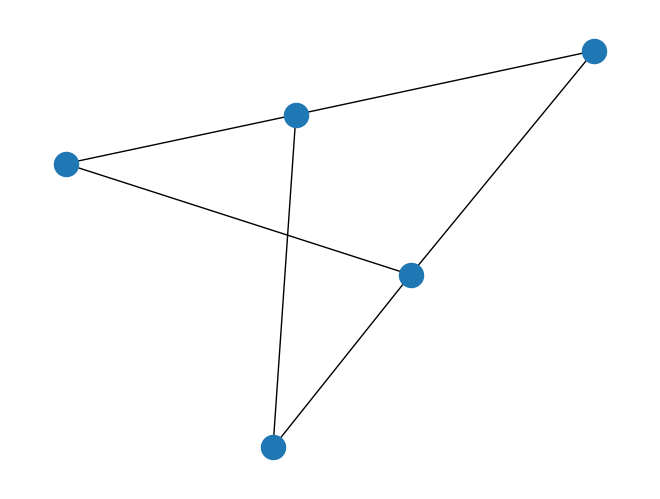

In [49]:
#let's see what we created
nx.draw(G)

This is not the optimal way to plot bipartite network, actually, we don't see that these nodes are not in the same group, let's make that better. First, we can identify two sets of nodes:

In [50]:
nx.bipartite.sets(G)

({0, 1}, {2, 3, 4})

(the way we were using before, would just give us all nodes without split into groups)

In [51]:
G.nodes

NodeView((0, 1, 2, 3, 4))

if we look at the edges, we can note that edges really exist only between groups as we expected:

In [52]:
list(G.edges)

[(0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4)]

We'll create two variables where we'll save sets of nodes for different groups as those will be useful for plots:

In [53]:
top, bottom = nx.bipartite.sets(G)

As before, we will plot network by first creating positions for network drawings, and then draw nodes and edges using those positions. Pay attention to the layout we've chosen now:

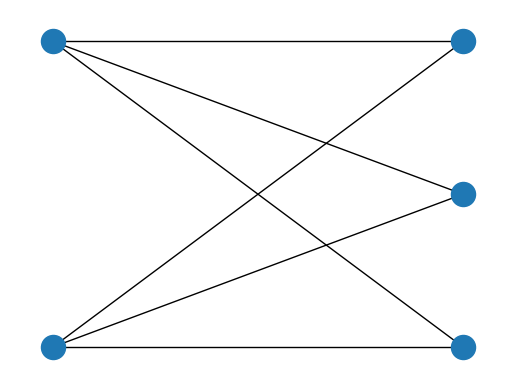

In [54]:
pos = nx.bipartite_layout(G, top)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
plt.axis('off')
plt.show()

Now the group separation is more clear, but as this network is fully connected it is not very interesting, let's try some other generated bipartite networks.

In [ ]:
G = nx.bipartite.gnmk_random_graph(3, 7, 10)#, seed=123)

In [ ]:
G_top = nx.projected_graph(G,top)
G_bottom = nx.projected_graph(G,bottom)

In [ ]:
G_top_w = nx.bipartite.weighted_projected_graph(G,top)

In [ ]:
nx.is_weighted(G_top),nx.is_weighted(G_top_w)

In [ ]:
pretty_plot(G_top)

In [ ]:
pretty_plot(G_bottom)

In [ ]:
G.add_edges_from([(0,10),(1,10),(2,10)])
pos = nx.bipartite_layout(G, top)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
plt.axis('off')
plt.show()

In [ ]:
G_top = nx.projected_graph(G,top)
pretty_plot(G_top)